In [23]:
import numpy as np 
import pandas as pd
import os
import seaborn as sns
import math
import matplotlib.pyplot as plt
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_absolute_error



In [24]:
df_train=pd.read_csv('train.zip')
df_train.info()
df_train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


In [25]:
df=df_train
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


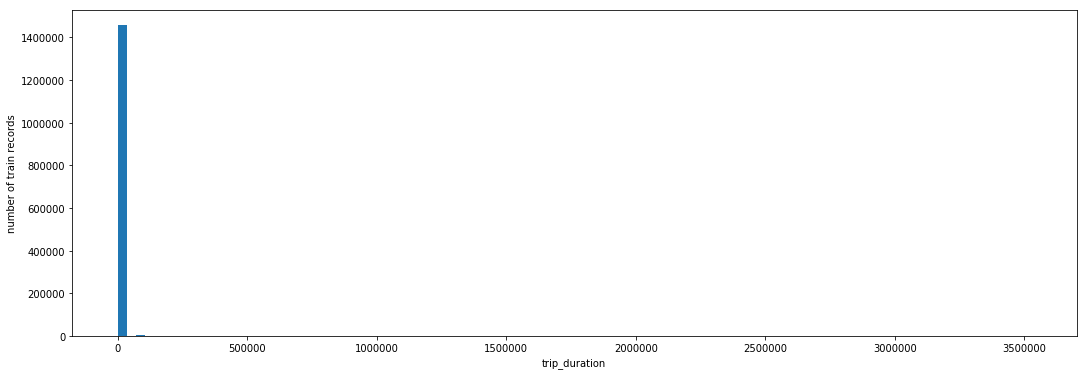

In [27]:
plt.subplots(figsize=(18,6))
plt.hist(df['trip_duration'].values, bins=100)
plt.xlabel('trip_duration')
plt.ylabel('number of train records')
plt.savefig("fig-1.eps")
plt.show()

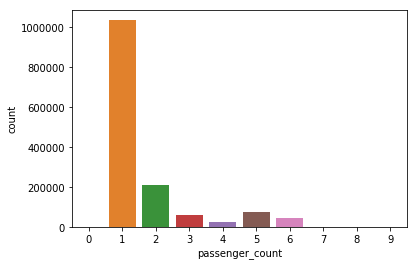

In [28]:
#plot the count of passenger_count
sns.countplot(x="passenger_count", data=df)
plt.savefig("fig-2.eps")
plt.show()

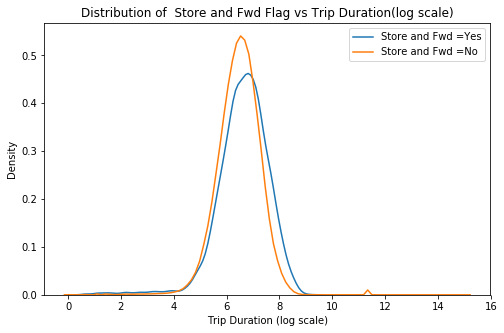

In [29]:
plt.figure(figsize=(8,5))
sns.kdeplot(np.log(df.loc[df['store_and_fwd_flag']=='Y','trip_duration'].values),label= 'Store and Fwd =Yes')
sns.kdeplot(np.log(df.loc[df['store_and_fwd_flag']=='N','trip_duration'].values),label= 'Store and Fwd =No')
   
plt.title("Distribution of  Store and Fwd Flag vs Trip Duration(log scale)")
plt.xlabel('Trip Duration (log scale)')
plt.ylabel('Density')
plt.savefig("fig-3.eps")

# 理解数据（表单说明）

 id - 每次行程的唯一ID
 vendor_id - 行程提供者的ID
 pickup_datetime - 上车的日期和时间
 dropoff_datetime - 停表的日期和时间
 passenger_count - 车辆中的乘客数量（驾驶员输入值）
 pickup_longitude - 上车的经度
 pickup_latitude - 上车的纬度
 dropoff_longitude - 下车经度
 dropoff_latitude - 下车的纬度
 store_and_fwd_flag - 行程记录是否为存储转发（或是直接发送）-- Y =存储和转发 N =没有存储
 trip_duration - 行程持续时间（秒）


In [30]:
df_train['store_and_fwd_flag'].value_counts()

N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64

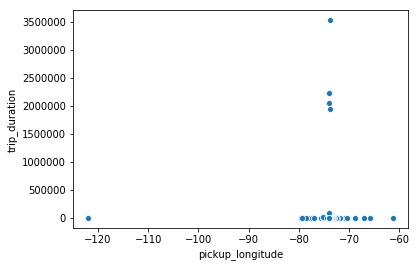

In [31]:
sns.scatterplot(x='pickup_longitude',y='trip_duration',data=df_train)

In [6]:
#根据经度纬度选择合适的时间，把少的干扰的数据删除掉,小于1000000都行
df_train= df_train.loc[df_train['trip_duration']<1000000]

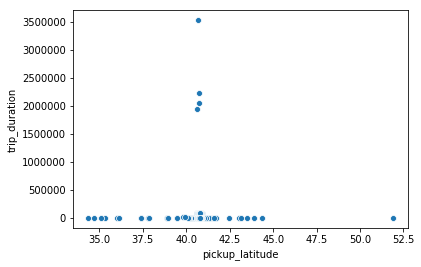

In [32]:
sns.scatterplot(x='pickup_latitude',y='trip_duration',data=df_train)

In [36]:
df_train['passenger_count'].unique()#数字编码
df_train= df_train.loc[df_train['passenger_count']!=0]#删除数字为0的数据
df_train

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...
1458639,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,373


In [35]:
#Drop column ID, "dropoff time" ( because duration and pickup time )
df_train.drop('id',inplace=True,axis=1)
df_train.drop('dropoff_datetime',inplace=True,axis=1)

KeyError: "['id'] not found in axis"

In [37]:
#Datetime: object->datetime-> hour, day of week, month
df_train["pickup_datetime"]=pd.to_datetime(df_train["pickup_datetime"])

In [38]:
df_train['day_of_week'] = df_train['pickup_datetime'].dt.day_name()

In [39]:
df_train['hour_of_the_day']=df_train['pickup_datetime'].dt.hour
df_train['month']=df_train['pickup_datetime'].dt.month

In [40]:
df_train['day_of_week']=df_train['day_of_week'].map({'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7})
df_train['store_and_fwd_flag']=df_train['store_and_fwd_flag'].map({'N':0,'Y':1}) #store_and_fwd_flag column: string to numeric
df_train

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,day_of_week,hour_of_the_day,month
0,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,0,455,1,17,3
1,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,0,663,7,0,6
2,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,2,11,1
3,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,0,429,3,19,4
4,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,0,435,6,13,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,0,778,5,13,4
1458640,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,0,655,7,7,1
1458641,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,0,764,5,6,4
1458642,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,0,373,2,15,1


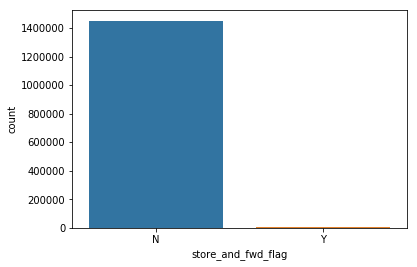

In [41]:
#plot the count of passenger_count
sns.countplot(x="store_and_fwd_flag", data=df)
plt.savefig("fig-4.eps")
plt.show()

In [42]:
#lat long to distance by haversine function
def haversine(lat1, lon1, lat2, lon2):
    # distance between latitudes and longitudes
    dLat = (lat2 - lat1) * math.pi / 180.0
    dLon = (lon2 - lon1) * math.pi / 180.0
 
    # convert to radians
    lat1 = (lat1) * math.pi / 180.0
    lat2 = (lat2) * math.pi / 180.0
 
    # apply formulae
    a = (pow(math.sin(dLat / 2), 2) +
         pow(math.sin(dLon / 2), 2) *
             math.cos(lat1) * math.cos(lat2));
    rad = 6371
    c = 2 * math.asin(math.sqrt(a))
    return rad * c

In [43]:

df_train['distance']=df_train.apply(lambda row:haversine(row['pickup_latitude'],row['pickup_longitude'],row['dropoff_latitude'],row['dropoff_longitude']),axis=1)
df_train['distance']=df_train['distance'].astype(float)

In [44]:
df_train.drop('pickup_longitude',inplace=True,axis=1)
df_train.drop('pickup_latitude',inplace=True,axis=1)
df_train.drop('dropoff_longitude',inplace=True,axis=1)
df_train.drop('dropoff_latitude',inplace=True,axis=1)
df_train.drop('pickup_datetime',inplace=True,axis=1)

Smoothing: Removing noise from data using clustering, regression techniques, etc.
Aggregation: Summary operations are applied to data.
Normalization: Scaling of data to fall within a smaller range.
Discretization: Raw values of numeric data are replaced by intervals. (for ex: age)

NYCity data:

# Normalization: trip_duration -> log(trip_duration)

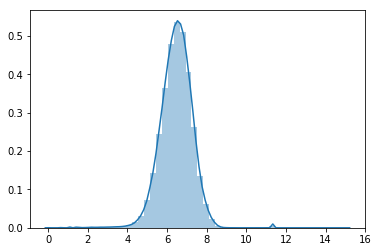

In [45]:

sns.distplot(np.log(df_train['trip_duration'].values))
df_train['trip_duration']=np.log(df_train['trip_duration'])
plt.savefig("fig-5.eps")

In [46]:
df_train

,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,day_of_week,hour_of_the_day,month,distance
0,2,1,0,6.120297,1,17,3,1.498521
1,1,1,0,6.496775,7,0,6,1.805507
2,2,1,0,7.661056,2,11,1,6.385098
3,2,1,0,6.061457,3,19,4,1.485498
4,2,1,0,6.075346,6,13,3,1.188588
...,...,...,...,...,...,...,...,...
1458639,2,4,0,6.656727,5,13,4,1.225080
1458640,1,1,0,6.484635,7,7,1,6.049836
1458641,2,1,0,6.638568,5,6,4,7.824606
1458642,1,1,0,5.921578,2,15,1,1.092564


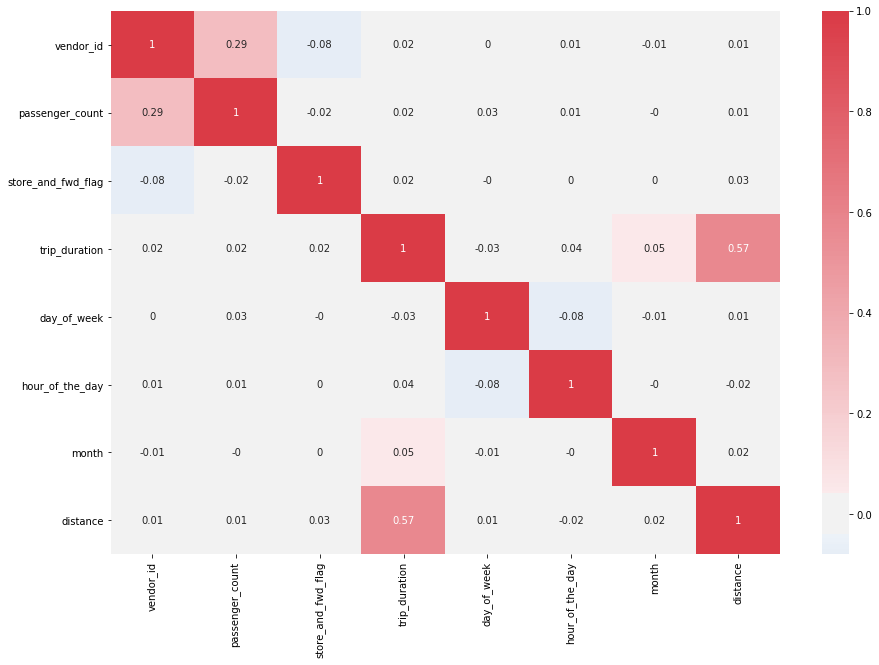

In [47]:
cor_matrix = df_train.corr().round(2)

fig = plt.figure(figsize = (15,10))
sns.heatmap(cor_matrix, annot = True, center = 0,
           cmap = sns.diverging_palette(250, 10, as_cmap = True),
           ax = plt.subplot(111))
plt.savefig("fig-6.eps")

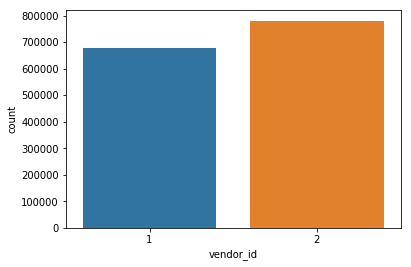

In [48]:
sns.countplot(x="vendor_id", data=df_train)
plt.savefig("fig-7.eps")
plt.show()

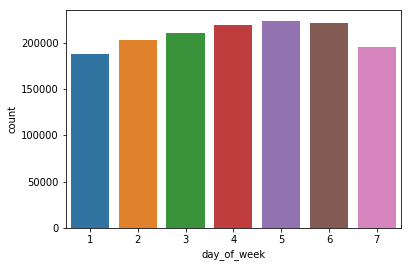

In [49]:
sns.countplot(x="day_of_week", data=df_train)
plt.savefig("fig-8.eps")
plt.show()

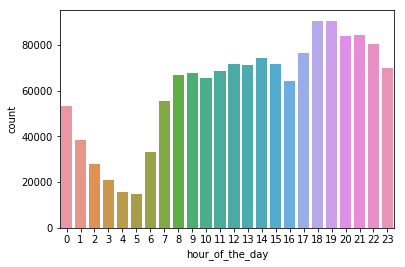

In [50]:
sns.countplot(x="hour_of_the_day", data=df_train)
plt.savefig("fig-9.eps")
plt.show()

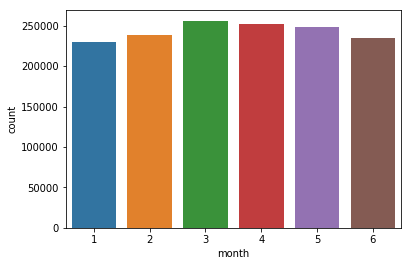

In [51]:
sns.countplot(x="month", data=df_train)
plt.savefig("fig-10.eps")
plt.show()

# 建模

In [52]:
X=df_train[['vendor_id','passenger_count','store_and_fwd_flag','day_of_week','hour_of_the_day','month','distance']]
X

,vendor_id,passenger_count,store_and_fwd_flag,day_of_week,hour_of_the_day,month,distance
0,2,1,0,1,17,3,1.498521
1,1,1,0,7,0,6,1.805507
2,2,1,0,2,11,1,6.385098
3,2,1,0,3,19,4,1.485498
4,2,1,0,6,13,3,1.188588
...,...,...,...,...,...,...,...
1458639,2,4,0,5,13,4,1.225080
1458640,1,1,0,7,7,1,6.049836
1458641,2,1,0,5,6,4,7.824606
1458642,1,1,0,2,15,1,1.092564


In [53]:
y=df_train[['trip_duration']]
y

,trip_duration
0,6.120297
1,6.496775
2,7.661056
3,6.061457
4,6.075346
...,...
1458639,6.656727
1458640,6.484635
1458641,6.638568
1458642,5.921578


In [54]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#  LGBMRegressor

In [55]:
#NYCity data: LGBMRegressor
m = LGBMRegressor(n_estimators=100)  #n_estimators (int, optional (default=100)) – Number of boosted trees to fit.
m.fit(x_train,y_train)
print(m.score(x_train,y_train)) #m score in this model is r2 score

KeyboardInterrupt: 

In [ ]:
#NYCity data: r2_score/ MSE --> This model should be compared to Google Distance Matrix API
y_pred = m.predict(x_test)
# print(m.score(x_test,y_test))
r2=r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

mae = mean_absolute_error(y_test,y_pred)

RMSE = math.sqrt(mse)
print("R2 score: %.2f" % r2)
print("MSE: %.2f" % mse)
print("MAE: %.2f" % mae)
print("RMSE: %.2f" % RMSE)

# 线性回归

In [ ]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)
print(lr_model.score(x_train,y_train)) #m score in this model is r2 score

#NYCity data: r2_score/ MSE --> This model should be compared to Google Distance Matrix API
y_pred = lr_model.predict(x_test)

r2=r2_score(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

mae = mean_absolute_error(y_test,y_pred)

RMSE = math.sqrt(mse)
print("R2 score: %.2f" % r2)
print("MSE: %.2f" % mse)
print("MAE: %.2f" % mae)
print("RMSE: %.2f" % RMSE)

In [ ]:
#Linear Regression
from sklearn import linear_model
model_LinearRegression = linear_model.LinearRegression()


#Decision Tree Regressor
from sklearn import tree
model_DecisionTreeRegressor = tree.DecisionTreeRegressor()

#SVM Regressor
from sklearn import svm
model_SVR = svm.SVR()
#K Neighbors Regressor
from sklearn import neighbors
model_KNeighborsRegressor = neighbors.KNeighborsRegressor()
#Random Forest Regressor
from sklearn import ensemble
model_RandomForestRegressor = ensemble.RandomForestRegressor(n_estimators=20)
#Adaboost Regressor
from sklearn import ensemble
model_AdaBoostRegressor = ensemble.AdaBoostRegressor(n_estimators=50)
#Gradient Boosting Random Forest Regressor
from sklearn import ensemble
model_GradientBoostingRegressor = ensemble.GradientBoostingRegressor(n_estimators=100)
#bagging Regressor
from sklearn.ensemble import BaggingRegressor
model_BaggingRegressor = BaggingRegressor()
#ExtraTree Regressor
from sklearn.tree import ExtraTreeRegressor
model_ExtraTreeRegressor = ExtraTreeRegressor()

# Decision Tree Regressor

In [ ]:
#Decision Tree Regressor
from sklearn import tree
model_DecisionTreeRegressor = tree.DecisionTreeRegressor()
model_DecisionTreeRegressor.fit(x_train,y_train)
print(model_DecisionTreeRegressor.score(x_train,y_train)) #m score in this model is r2 score

#NYCity data: r2_score/ MSE --> This model should be compared to Google Distance Matrix API
y_pred = model_DecisionTreeRegressor.predict(x_test)

r2=r2_score(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

mae = mean_absolute_error(y_test,y_pred)

RMSE = math.sqrt(mse)
print("R2 score: %.2f" % r2)
print("MSE: %.2f" % mse)
print("MAE: %.2f" % mae)
print("RMSE: %.2f" % RMSE)

# Data visualization and knowledge representation tools are used to represent the mined data

In [ ]:
y_test

In [ ]:
y_pred

In [ ]:
x_ax = range(len(y_test))
plt.figure(figsize=(20, 12))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("NY dataset test and predicted data")
plt.xlabel('X')
plt.ylabel('time')
plt.grid(True)
plt.show() 